# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [23]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import pprint

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [24]:
#List for holding lat_lngs and cities
lat_lngs = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

cities = []
countries = []

# Identify nearest city for each lat, lng combination
for lat_lngs in lat_lngs:
    lat, lon = lat_lngs
    name = citipy.nearest_city(lat, lon).city_name
    country_code = citipy.nearest_city(lat, lon).country_code
    cities.append(name)
    countries.append(country_code)
cities_df = pd.DataFrame({"City": cities, "Country": countries})  

# Drop any duplicate values
cities_df = cities_df.drop_duplicates('City')

# Visualize the data frame
cities_df.head(2)


,City,Country
0,bluff,nz
1,yagodnoye,ru


In [25]:
# # ~~~~~~~~~~~~~~~~~~~~~ Creating a dictionary to hold the values

# # Adding additional columns to the exost
# const_cities = {}

# url = "http://api.openweathermap.org/data/2.5/weather?"
# units = "metric"
# query_url = f"{url}appid={api_key}&units={units}&q="

# for city in cities:
#     response = requests.get(query_url + city).json()
#     if city not in const_cities:
#         const_cities[city] = ""
#     const_cities[city] = response['name']
#     #const_cities.lat.append(response['coord']['lat'])
#     print(response)
# print(const_cities) 

In [26]:
# Creating a new DataFrame
cities_df["Date"] = ""
cities_df['Lat'] = ""
cities_df["Lng"] = ""
cities_df["Humidity"] = ""
cities_df["Wind Speed"] = ""
cities_df["Cloudiness"] = ""
cities_df["Max Temp"] = ""

cities_df.head(2)

,City,Country,Date,Lat,Lng,Humidity,Wind Speed,Cloudiness,Max Temp
0,bluff,nz,,,,,,,
1,yagodnoye,ru,,,,,,,


In [27]:
row_count = 0

print("DATA RETRIEVAL")
print("~~~~~~~~~~~~~~~~~~~~~~~")

# Loop through the cities and perform API Calls
for index, row in cities_df.iterrows():
    target_url = "http://api.openweathermap.org/data/2.5/weather?q=%s&units=IMPERIAL&appid=%s" %(row["City"], api_key)
    response = requests.get(target_url).json()
    print("----------------------")
    print("Now retrieving city #%s: %s" % (row_count + 1, cities_df.loc[index]["City"]))
    print(target_url)
    row_count += 1
    
    try:     
        cities_df.set_value(index, "Lat", response["coord"]["lat"])
        cities_df.set_value(index, "Lng", response["coord"]["lon"])
        cities_df.set_value(index, "Date", response["dt"])
        cities_df.set_value(index, "Humidity", response["main"]["humidity"])
        cities_df.set_value(index, "Max Temp", response["main"]["temp_max"])
        cities_df.set_value(index, "Wind Speed", response["wind"]["speed"])
        cities_df.set_value(index, "Cloudiness", response["clouds"]["all"])
           
    except Exception as e:
        print(e)
        print("City not found. Skipping...")
        
    if row_count % 50 == 0:
        print("~~~~~~~~~~~~~~~~~~~~~~~~")
        print("PAUSE")
        time.sleep(30)
        
print("~~~~~~~~~~~~~~~~~~~~~~~~")
print("DATA RETRIEVAL COMPLETE")


DATA RETRIEVAL
~~~~~~~~~~~~~~~~~~~~~~~
----------------------
Now retrieving city #1: bluff
http://api.openweathermap.org/data/2.5/weather?q=bluff&units=IMPERIAL&appid=b6efcd0fa8c7d0e32275b8ea3b5a53e3
----------------------
Now retrieving city #2: yagodnoye
http://api.openweathermap.org/data/2.5/weather?q=yagodnoye&units=IMPERIAL&appid=b6efcd0fa8c7d0e32275b8ea3b5a53e3


/anaconda3/envs/PythonData/lib/python3.7/site-packages/ipykernel_launcher.py:16: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  app.launch_new_instance()
/anaconda3/envs/PythonData/lib/python3.7/site-packages/ipykernel_launcher.py:17: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/anaconda3/envs/PythonData/lib/python3.7/site-packages/ipykernel_launcher.py:18: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/anaconda3/envs/PythonData/lib/python3.7/site-packages/ipykernel_launcher.py:19: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/anaconda3/envs/PythonData/lib/python3.7/site-packages/ipykernel_launcher.py:20: FutureWarning: set_value is deprecated and will be removed in a fut

----------------------
Now retrieving city #3: hofn
http://api.openweathermap.org/data/2.5/weather?q=hofn&units=IMPERIAL&appid=b6efcd0fa8c7d0e32275b8ea3b5a53e3
----------------------
Now retrieving city #4: bu salim
http://api.openweathermap.org/data/2.5/weather?q=bu salim&units=IMPERIAL&appid=b6efcd0fa8c7d0e32275b8ea3b5a53e3
'coord'
City not found. Skipping...
----------------------
Now retrieving city #5: punta arenas
http://api.openweathermap.org/data/2.5/weather?q=punta arenas&units=IMPERIAL&appid=b6efcd0fa8c7d0e32275b8ea3b5a53e3
----------------------
Now retrieving city #6: nizhniy kuranakh
http://api.openweathermap.org/data/2.5/weather?q=nizhniy kuranakh&units=IMPERIAL&appid=b6efcd0fa8c7d0e32275b8ea3b5a53e3
----------------------
Now retrieving city #7: okhotsk
http://api.openweathermap.org/data/2.5/weather?q=okhotsk&units=IMPERIAL&appid=b6efcd0fa8c7d0e32275b8ea3b5a53e3
----------------------
Now retrieving city #8: marawi
http://api.openweathermap.org/data/2.5/weather?q=marawi&

----------------------
Now retrieving city #51: livingstonia
http://api.openweathermap.org/data/2.5/weather?q=livingstonia&units=IMPERIAL&appid=b6efcd0fa8c7d0e32275b8ea3b5a53e3
----------------------
Now retrieving city #52: belushya guba
http://api.openweathermap.org/data/2.5/weather?q=belushya guba&units=IMPERIAL&appid=b6efcd0fa8c7d0e32275b8ea3b5a53e3
'coord'
City not found. Skipping...
----------------------
Now retrieving city #53: ayame
http://api.openweathermap.org/data/2.5/weather?q=ayame&units=IMPERIAL&appid=b6efcd0fa8c7d0e32275b8ea3b5a53e3
----------------------
Now retrieving city #54: lorengau
http://api.openweathermap.org/data/2.5/weather?q=lorengau&units=IMPERIAL&appid=b6efcd0fa8c7d0e32275b8ea3b5a53e3
----------------------
Now retrieving city #55: albany
http://api.openweathermap.org/data/2.5/weather?q=albany&units=IMPERIAL&appid=b6efcd0fa8c7d0e32275b8ea3b5a53e3
----------------------
Now retrieving city #56: san lorenzo
http://api.openweathermap.org/data/2.5/weather?q=sa

----------------------
Now retrieving city #99: fagersta
http://api.openweathermap.org/data/2.5/weather?q=fagersta&units=IMPERIAL&appid=b6efcd0fa8c7d0e32275b8ea3b5a53e3
----------------------
Now retrieving city #100: ushuaia
http://api.openweathermap.org/data/2.5/weather?q=ushuaia&units=IMPERIAL&appid=b6efcd0fa8c7d0e32275b8ea3b5a53e3
~~~~~~~~~~~~~~~~~~~~~~~~
PAUSE
----------------------
Now retrieving city #101: naftah
http://api.openweathermap.org/data/2.5/weather?q=naftah&units=IMPERIAL&appid=b6efcd0fa8c7d0e32275b8ea3b5a53e3
'coord'
City not found. Skipping...
----------------------
Now retrieving city #102: hualmay
http://api.openweathermap.org/data/2.5/weather?q=hualmay&units=IMPERIAL&appid=b6efcd0fa8c7d0e32275b8ea3b5a53e3
----------------------
Now retrieving city #103: lompoc
http://api.openweathermap.org/data/2.5/weather?q=lompoc&units=IMPERIAL&appid=b6efcd0fa8c7d0e32275b8ea3b5a53e3
----------------------
Now retrieving city #104: bambous virieux
http://api.openweathermap.org/d

----------------------
Now retrieving city #148: diamantino
http://api.openweathermap.org/data/2.5/weather?q=diamantino&units=IMPERIAL&appid=b6efcd0fa8c7d0e32275b8ea3b5a53e3
----------------------
Now retrieving city #149: klaksvik
http://api.openweathermap.org/data/2.5/weather?q=klaksvik&units=IMPERIAL&appid=b6efcd0fa8c7d0e32275b8ea3b5a53e3
----------------------
Now retrieving city #150: whitehorse
http://api.openweathermap.org/data/2.5/weather?q=whitehorse&units=IMPERIAL&appid=b6efcd0fa8c7d0e32275b8ea3b5a53e3
~~~~~~~~~~~~~~~~~~~~~~~~
PAUSE
----------------------
Now retrieving city #151: vila velha
http://api.openweathermap.org/data/2.5/weather?q=vila velha&units=IMPERIAL&appid=b6efcd0fa8c7d0e32275b8ea3b5a53e3
----------------------
Now retrieving city #152: sehithwa
http://api.openweathermap.org/data/2.5/weather?q=sehithwa&units=IMPERIAL&appid=b6efcd0fa8c7d0e32275b8ea3b5a53e3
----------------------
Now retrieving city #153: mnogovershinnyy
http://api.openweathermap.org/data/2.5/wea

----------------------
Now retrieving city #195: fethiye
http://api.openweathermap.org/data/2.5/weather?q=fethiye&units=IMPERIAL&appid=b6efcd0fa8c7d0e32275b8ea3b5a53e3
----------------------
Now retrieving city #196: zhenjiang
http://api.openweathermap.org/data/2.5/weather?q=zhenjiang&units=IMPERIAL&appid=b6efcd0fa8c7d0e32275b8ea3b5a53e3
----------------------
Now retrieving city #197: hamilton
http://api.openweathermap.org/data/2.5/weather?q=hamilton&units=IMPERIAL&appid=b6efcd0fa8c7d0e32275b8ea3b5a53e3
----------------------
Now retrieving city #198: porto novo
http://api.openweathermap.org/data/2.5/weather?q=porto novo&units=IMPERIAL&appid=b6efcd0fa8c7d0e32275b8ea3b5a53e3
----------------------
Now retrieving city #199: leningradskiy
http://api.openweathermap.org/data/2.5/weather?q=leningradskiy&units=IMPERIAL&appid=b6efcd0fa8c7d0e32275b8ea3b5a53e3
----------------------
Now retrieving city #200: tiksi
http://api.openweathermap.org/data/2.5/weather?q=tiksi&units=IMPERIAL&appid=b6efc

----------------------
Now retrieving city #243: haimen
http://api.openweathermap.org/data/2.5/weather?q=haimen&units=IMPERIAL&appid=b6efcd0fa8c7d0e32275b8ea3b5a53e3
----------------------
Now retrieving city #244: stykkisholmur
http://api.openweathermap.org/data/2.5/weather?q=stykkisholmur&units=IMPERIAL&appid=b6efcd0fa8c7d0e32275b8ea3b5a53e3
----------------------
Now retrieving city #245: port blair
http://api.openweathermap.org/data/2.5/weather?q=port blair&units=IMPERIAL&appid=b6efcd0fa8c7d0e32275b8ea3b5a53e3
----------------------
Now retrieving city #246: nishihara
http://api.openweathermap.org/data/2.5/weather?q=nishihara&units=IMPERIAL&appid=b6efcd0fa8c7d0e32275b8ea3b5a53e3
----------------------
Now retrieving city #247: buala
http://api.openweathermap.org/data/2.5/weather?q=buala&units=IMPERIAL&appid=b6efcd0fa8c7d0e32275b8ea3b5a53e3
----------------------
Now retrieving city #248: nakhon pathom
http://api.openweathermap.org/data/2.5/weather?q=nakhon pathom&units=IMPERIAL&app

----------------------
Now retrieving city #291: sur
http://api.openweathermap.org/data/2.5/weather?q=sur&units=IMPERIAL&appid=b6efcd0fa8c7d0e32275b8ea3b5a53e3
----------------------
Now retrieving city #292: fort saint james
http://api.openweathermap.org/data/2.5/weather?q=fort saint james&units=IMPERIAL&appid=b6efcd0fa8c7d0e32275b8ea3b5a53e3
----------------------
Now retrieving city #293: fortuna
http://api.openweathermap.org/data/2.5/weather?q=fortuna&units=IMPERIAL&appid=b6efcd0fa8c7d0e32275b8ea3b5a53e3
----------------------
Now retrieving city #294: chifeng
http://api.openweathermap.org/data/2.5/weather?q=chifeng&units=IMPERIAL&appid=b6efcd0fa8c7d0e32275b8ea3b5a53e3
----------------------
Now retrieving city #295: san ignacio
http://api.openweathermap.org/data/2.5/weather?q=san ignacio&units=IMPERIAL&appid=b6efcd0fa8c7d0e32275b8ea3b5a53e3
----------------------
Now retrieving city #296: wang noi
http://api.openweathermap.org/data/2.5/weather?q=wang noi&units=IMPERIAL&appid=b6efc

----------------------
Now retrieving city #338: kyren
http://api.openweathermap.org/data/2.5/weather?q=kyren&units=IMPERIAL&appid=b6efcd0fa8c7d0e32275b8ea3b5a53e3
----------------------
Now retrieving city #339: kahului
http://api.openweathermap.org/data/2.5/weather?q=kahului&units=IMPERIAL&appid=b6efcd0fa8c7d0e32275b8ea3b5a53e3
----------------------
Now retrieving city #340: khingansk
http://api.openweathermap.org/data/2.5/weather?q=khingansk&units=IMPERIAL&appid=b6efcd0fa8c7d0e32275b8ea3b5a53e3
----------------------
Now retrieving city #341: luderitz
http://api.openweathermap.org/data/2.5/weather?q=luderitz&units=IMPERIAL&appid=b6efcd0fa8c7d0e32275b8ea3b5a53e3
----------------------
Now retrieving city #342: seydi
http://api.openweathermap.org/data/2.5/weather?q=seydi&units=IMPERIAL&appid=b6efcd0fa8c7d0e32275b8ea3b5a53e3
----------------------
Now retrieving city #343: opuwo
http://api.openweathermap.org/data/2.5/weather?q=opuwo&units=IMPERIAL&appid=b6efcd0fa8c7d0e32275b8ea3b5a53e

----------------------
Now retrieving city #386: payo
http://api.openweathermap.org/data/2.5/weather?q=payo&units=IMPERIAL&appid=b6efcd0fa8c7d0e32275b8ea3b5a53e3
----------------------
Now retrieving city #387: tigil
http://api.openweathermap.org/data/2.5/weather?q=tigil&units=IMPERIAL&appid=b6efcd0fa8c7d0e32275b8ea3b5a53e3
----------------------
Now retrieving city #388: shache
http://api.openweathermap.org/data/2.5/weather?q=shache&units=IMPERIAL&appid=b6efcd0fa8c7d0e32275b8ea3b5a53e3
----------------------
Now retrieving city #389: damietta
http://api.openweathermap.org/data/2.5/weather?q=damietta&units=IMPERIAL&appid=b6efcd0fa8c7d0e32275b8ea3b5a53e3
----------------------
Now retrieving city #390: chute-aux-outardes
http://api.openweathermap.org/data/2.5/weather?q=chute-aux-outardes&units=IMPERIAL&appid=b6efcd0fa8c7d0e32275b8ea3b5a53e3
----------------------
Now retrieving city #391: mareeba
http://api.openweathermap.org/data/2.5/weather?q=mareeba&units=IMPERIAL&appid=b6efcd0fa8c7d

----------------------
Now retrieving city #433: beringovskiy
http://api.openweathermap.org/data/2.5/weather?q=beringovskiy&units=IMPERIAL&appid=b6efcd0fa8c7d0e32275b8ea3b5a53e3
----------------------
Now retrieving city #434: bintulu
http://api.openweathermap.org/data/2.5/weather?q=bintulu&units=IMPERIAL&appid=b6efcd0fa8c7d0e32275b8ea3b5a53e3
----------------------
Now retrieving city #435: doctor pedro p. pena
http://api.openweathermap.org/data/2.5/weather?q=doctor pedro p. pena&units=IMPERIAL&appid=b6efcd0fa8c7d0e32275b8ea3b5a53e3
'coord'
City not found. Skipping...
----------------------
Now retrieving city #436: cape canaveral
http://api.openweathermap.org/data/2.5/weather?q=cape canaveral&units=IMPERIAL&appid=b6efcd0fa8c7d0e32275b8ea3b5a53e3
----------------------
Now retrieving city #437: hajipur
http://api.openweathermap.org/data/2.5/weather?q=hajipur&units=IMPERIAL&appid=b6efcd0fa8c7d0e32275b8ea3b5a53e3
----------------------
Now retrieving city #438: adrar
http://api.openweat

----------------------
Now retrieving city #481: aklavik
http://api.openweathermap.org/data/2.5/weather?q=aklavik&units=IMPERIAL&appid=b6efcd0fa8c7d0e32275b8ea3b5a53e3
----------------------
Now retrieving city #482: rennes
http://api.openweathermap.org/data/2.5/weather?q=rennes&units=IMPERIAL&appid=b6efcd0fa8c7d0e32275b8ea3b5a53e3
----------------------
Now retrieving city #483: zhangye
http://api.openweathermap.org/data/2.5/weather?q=zhangye&units=IMPERIAL&appid=b6efcd0fa8c7d0e32275b8ea3b5a53e3
----------------------
Now retrieving city #484: shimoda
http://api.openweathermap.org/data/2.5/weather?q=shimoda&units=IMPERIAL&appid=b6efcd0fa8c7d0e32275b8ea3b5a53e3
----------------------
Now retrieving city #485: komsomolskiy
http://api.openweathermap.org/data/2.5/weather?q=komsomolskiy&units=IMPERIAL&appid=b6efcd0fa8c7d0e32275b8ea3b5a53e3
----------------------
Now retrieving city #486: banff
http://api.openweathermap.org/data/2.5/weather?q=banff&units=IMPERIAL&appid=b6efcd0fa8c7d0e32275b

----------------------
Now retrieving city #530: lasa
http://api.openweathermap.org/data/2.5/weather?q=lasa&units=IMPERIAL&appid=b6efcd0fa8c7d0e32275b8ea3b5a53e3
----------------------
Now retrieving city #531: monkey bay
http://api.openweathermap.org/data/2.5/weather?q=monkey bay&units=IMPERIAL&appid=b6efcd0fa8c7d0e32275b8ea3b5a53e3
----------------------
Now retrieving city #532: kununurra
http://api.openweathermap.org/data/2.5/weather?q=kununurra&units=IMPERIAL&appid=b6efcd0fa8c7d0e32275b8ea3b5a53e3
----------------------
Now retrieving city #533: humberto de campos
http://api.openweathermap.org/data/2.5/weather?q=humberto de campos&units=IMPERIAL&appid=b6efcd0fa8c7d0e32275b8ea3b5a53e3
----------------------
Now retrieving city #534: gorkovskoye
http://api.openweathermap.org/data/2.5/weather?q=gorkovskoye&units=IMPERIAL&appid=b6efcd0fa8c7d0e32275b8ea3b5a53e3
'coord'
City not found. Skipping...
----------------------
Now retrieving city #535: san policarpo
http://api.openweathermap.o

----------------------
Now retrieving city #576: ambilobe
http://api.openweathermap.org/data/2.5/weather?q=ambilobe&units=IMPERIAL&appid=b6efcd0fa8c7d0e32275b8ea3b5a53e3
----------------------
Now retrieving city #577: sol-iletsk
http://api.openweathermap.org/data/2.5/weather?q=sol-iletsk&units=IMPERIAL&appid=b6efcd0fa8c7d0e32275b8ea3b5a53e3
----------------------
Now retrieving city #578: nanortalik
http://api.openweathermap.org/data/2.5/weather?q=nanortalik&units=IMPERIAL&appid=b6efcd0fa8c7d0e32275b8ea3b5a53e3
----------------------
Now retrieving city #579: grand gaube
http://api.openweathermap.org/data/2.5/weather?q=grand gaube&units=IMPERIAL&appid=b6efcd0fa8c7d0e32275b8ea3b5a53e3
----------------------
Now retrieving city #580: mende
http://api.openweathermap.org/data/2.5/weather?q=mende&units=IMPERIAL&appid=b6efcd0fa8c7d0e32275b8ea3b5a53e3
----------------------
Now retrieving city #581: campo maior
http://api.openweathermap.org/data/2.5/weather?q=campo maior&units=IMPERIAL&appid

In [28]:
cities_df.head(2)

,City,Country,Date,Lat,Lng,Humidity,Wind Speed,Cloudiness,Max Temp
0,bluff,nz,1553644308,-23.58,149.07,57,9.24,48,83.83
1,yagodnoye,ru,1553644308,62.52,149.63,69,8.01,80,6.75


In [29]:
# Replace empty rows with NuN
cities_df['Date'].replace('', np.nan, inplace=True)
cities_df['Lat'].replace('', np.nan, inplace=True)
cities_df['Lng'].replace('', np.nan, inplace=True)
cities_df['Humidity'].replace('', np.nan, inplace=True)
cities_df['Wind Speed'].replace('', np.nan, inplace=True)
cities_df['Cloudiness'].replace('', np.nan, inplace=True)
cities_df['Max Temp'].replace('', np.nan, inplace=True)

cities_df.head(2)

,City,Country,Date,Lat,Lng,Humidity,Wind Speed,Cloudiness,Max Temp
0,bluff,nz,1.553644e+09,-23.58,149.07,57.0,9.24,48.0,83.83
1,yagodnoye,ru,1.553644e+09,62.52,149.63,69.0,8.01,80.0,6.75


In [30]:
# Dropn NaN Rows
clean_cities_df = cities_df.dropna()
clean_cities_df.head(2)

,City,Country,Date,Lat,Lng,Humidity,Wind Speed,Cloudiness,Max Temp
0,bluff,nz,1.553644e+09,-23.58,149.07,57.0,9.24,48.0,83.83
1,yagodnoye,ru,1.553644e+09,62.52,149.63,69.0,8.01,80.0,6.75


In [32]:
# clean_cities_df['Date'] = clean_cities_df['Date'].astype('datetime64[ns]')
# clean_cities_df
clean_cities_df['Date'] = pd.to_datetime(clean_cities_df['Date'], unit='s')
clean_cities_df.head(2)

/anaconda3/envs/PythonData/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,City,Country,Date,Lat,Lng,Humidity,Wind Speed,Cloudiness,Max Temp
0,bluff,nz,2019-03-26 23:51:48,-23.58,149.07,57.0,9.24,48.0,83.83
1,yagodnoye,ru,2019-03-26 23:51:48,62.52,149.63,69.0,8.01,80.0,6.75


In [21]:
# converting DataFrame to csv
clean_cities_df.to_csv("clean_cities.csv", index=False, header=True)

#### Latitude vs. Temperature Plot

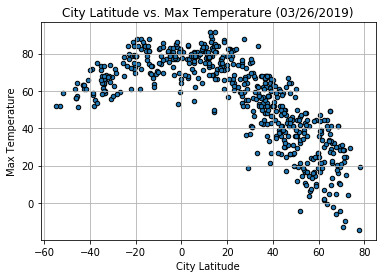

In [33]:
ax1 = cities_df.plot.scatter(x='Lat',
                       y='Max Temp',
                       facecolors="blue", marker="o", edgecolors="black", alpha=1)
plt.title("City Latitude vs. Max Temperature (03/26/2019)")
plt.xlabel("City Latitude")
plt.ylabel("Max Temperature")
plt.grid()

In [32]:
# Save picture
plt.savefig('City Latitude vs. Max Temperature.png')

<Figure size 432x288 with 0 Axes>

#### Latitude vs. Humidity Plot

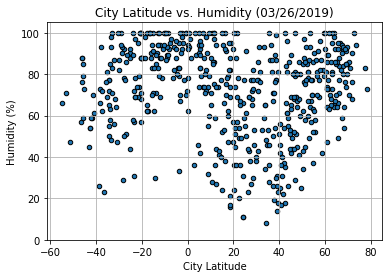

In [28]:
ax2 = clean_cities_df.plot.scatter(x='Lat',
                       y='Humidity',
                       facecolors="blue", marker="o", edgecolors="black", alpha=1)
plt.title("City Latitude vs. Humidity (03/26/2019)")
plt.xlabel("City Latitude")
plt.ylabel("Humidity (%)")
plt.ylim(0, 105)
plt.grid()

In [33]:
# Save picture
plt.savefig('City Latitude vs. Humidity.png')

<Figure size 432x288 with 0 Axes>

#### Latitude vs. Cloudiness Plot

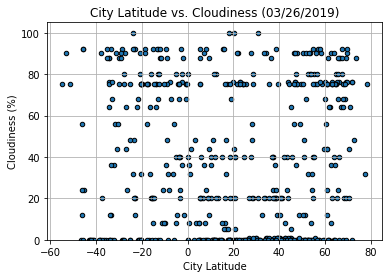

In [29]:
ax3 = clean_cities_df.plot.scatter(x='Lat',
                       y='Cloudiness',
                       facecolors="blue", marker="o", edgecolors="black", alpha=1)
plt.title("City Latitude vs. Cloudiness (03/26/2019)")
plt.xlabel("City Latitude")
plt.ylabel("Cloudiness (%)")
plt.ylim(0, 105)
plt.grid()

In [34]:
# Save picture
plt.savefig('City Latitude vs. Cloudiness.png')

<Figure size 432x288 with 0 Axes>

#### Latitude vs. Wind Speed Plot

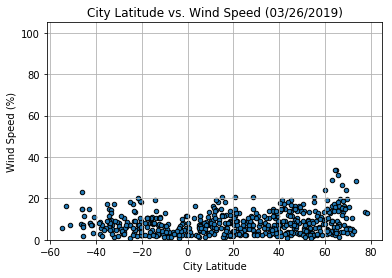

In [30]:
ax4 = clean_cities_df.plot.scatter(x='Lat',
                       y='Wind Speed',
                       facecolors="blue", marker="o", edgecolors="black", alpha=1)
plt.title("City Latitude vs. Wind Speed (03/26/2019)")
plt.xlabel("City Latitude")
plt.ylabel("Wind Speed (%)")
plt.ylim(0, 105)
plt.grid()

In [35]:
# Save picture
plt.savefig('City Latitude vs. Wind Speed.png')

<Figure size 432x288 with 0 Axes>